In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import shap

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)



Load dataset

In [3]:
df = pd.read_csv('/Users/nipunnirman/Documents/GitHub/Dementia-Prediction-Machine-Learning-Model/Dementia Prediction Dataset copy.csv')



df.head()

Dataset shape: (195196, 1024)
Number of rows: 195,196
Number of columns: 1,024


,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [4]:
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]:,}")

Dataset shape: (195196, 1024)
Number of rows: 195,196
Number of columns: 1,024


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195196 entries, 0 to 195195
Columns: 1024 entries, NACCID to NPATGFR4
dtypes: float64(135), int64(747), object(142)
memory usage: 1.5+ GB


In [6]:
df.describe()

,NACCADC,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
count,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,...,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000
mean,4999.759252,2.355919,6.364260,15.437145,2014.374101,3.820965,6.641929,5.774811,2434.066963,1203.667380,...,-3.916356,-3.913712,-3.918195,-3.914148,-3.916807,-3.899101,-3.969979,-3.968734,-3.969379,-3.970245
std,2980.944552,0.698246,3.395659,8.606407,5.331593,3.100083,4.248845,3.955649,1778.039584,1304.934417,...,0.747503,0.782803,0.743216,0.771894,0.746140,0.812174,0.461850,0.473300,0.463654,0.462078
min,186.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,2289.000000,2.000000,3.000000,8.000000,2010.000000,1.000000,3.000000,3.000000,1031.000000,0.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
50%,4967.000000,2.000000,6.000000,15.000000,2014.000000,3.000000,6.000000,5.000000,2155.000000,782.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
75%,8361.000000,3.000000,9.000000,23.000000,2019.000000,5.000000,9.000000,8.000000,3678.000000,1842.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
max,9661.000000,3.200000,12.000000,31.000000,2024.000000,20.000000,20.000000,20.000000,6872.000000,6872.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
print("All columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

All columns:
  1. NACCID
  2. NACCADC
  3. PACKET
  4. FORMVER
  5. VISITMO
  6. VISITDAY
  7. VISITYR
  8. NACCVNUM
  9. NACCAVST
 10. NACCNVST
 11. NACCDAYS
 12. NACCFDYS
 13. NACCCORE
 14. NACCREAS
 15. NACCREFR
 16. BIRTHMO
 17. BIRTHYR
 18. SEX
 19. HISPANIC
 20. HISPOR
 21. HISPORX
 22. RACE
 23. RACEX
 24. RACESEC
 25. RACESECX
 26. RACETER
 27. RACETERX
 28. PRIMLANG
 29. PRIMLANX
 30. EDUC
 31. MARISTAT
 32. NACCLIVS
 33. INDEPEND
 34. RESIDENC
 35. HANDED
 36. INBIRMO
 37. INBIRYR
 38. INSEX
 39. NEWINF
 40. INHISP
 41. INHISPOR
 42. INHISPOX
 43. NACCNINR
 44. INRACE
 45. INRACEX
 46. INRASEC
 47. INRASECX
 48. INRATER
 49. INRATERX
 50. INEDUC
 51. INRELTO
 52. INRELTOX
 53. INKNOWN
 54. INLIVWTH
 55. INVISITS
 56. INCALLS
 57. INRELY
 58. NACCFAM
 59. NACCMOM
 60. NACCDAD
 61. NACCAM
 62. NACCAMX
 63. NACCAMS
 64. NACCAMSX
 65. NACCFM
 66. NACCFMX
 67. NACCFMS
 68. NACCFMSX
 69. NACCOM
 70. NACCOMX
 71. NACCOMS
 72. NACCOMSX
 73. NACCFADM
 74. NACCFFTD
 75. ANYMEDS
 76. DR

identify Non-Medical Variable

In [9]:
NON_MEDICAL_FEATURES = {
'visit_info': [
        'NACCID',       # Subject ID
        'NACCADC',      # ADC at which subject was seen
        'PACKET',       # Packet code (I=Initial, F=Follow-up, T=Telephone)
        'FORMVER',      # Form version
        'VISITMO',      # Visit month
        'VISITDAY',     # Visit day
        'VISITYR',      # Visit year
        'NACCVNUM',     # Visit number (order)
        'NACCAVST',     # Total number of all UDS visits
        'NACCNVST',     # Total number of in-person visits
        'NACCDAYS',     # Days from initial to most recent visit
        'NACCFDYS',     # Days from initial to each follow-up
    ],
    'subject_demographics': [
        # Birth & Age
        'BIRTHMO',      # Birth month
        'BIRTHYR',      # Birth year
        'NACCAGE',      # Age at visit ⭐ STRONGEST PREDICTOR
        'NACCAGEB',     # Age at baseline/initial visit
        
        # Sex & Gender
        'SEX',          # Sex (1=Male, 2=Female)
        
        # Race & Ethnicity
        'HISPANIC',     # Hispanic/Latino ethnicity
        'HISPOR',       # Hispanic origin
        'HISPORX',      # Hispanic origin, other (specify)
        'RACE',         # Primary race
        'RACEX',        # Race, other (specify)
        'RACESEC',      # Second race
        'RACESECX',     # Second race, other
        'RACETER',      # Third race
        'RACETERX',     # Third race, other
        'NACCNIHR',     # Derived NIH race category
        
        # Language
        'PRIMLANG',     # Primary language
        'PRIMLANX',     # Primary language, other
         'EDUC',         # Years of education (0-36)
        
        # Marital & Living Situation ⭐ KEY PREDICTORS
        'MARISTAT',     # Marital status (1=Married, 2=Widowed, etc.)
        'NACCLIVS',     # Living situation (derived)
        'INDEPEND',     # Level of independence
        'RESIDENC',     # Type of residence
        
        # Other
        'HANDED',       # Handedness (1=Left, 2=Right, 3=Ambidextrous)
        'NACCREAS',     # Primary reason for coming to ADC (derived)
        'NACCREFR',     # Principal referral source (derived)
    ],
    'coparticipant_demographics': [
        'INBIRMO',      # Co-participant birth month
        'INBIRYR',      # Co-participant birth year
        'INSEX',        # Co-participant sex
        'NEWINF',       # Is this a new co-participant?
        
        # Co-participant Race/Ethnicity
        'INHISP',       # Hispanic/Latino
        'INHISPOR',     # Hispanic origin
        'INHISPOX',     # Hispanic origin, other
        'INRACE',       # Race
        'INRACEX',      # Race, other
        'INRASEC',      # Second race
        'INRASECX',     # Second race, other
        'INRATER',      # Third race
        'INRATERX',     # Third race, other
        
        # Co-participant Education & Relationship
        'INEDUC',       # Years of education
        'INRELTO',      # Relationship to subject ⭐
        'INRELTOX',     # Relationship, other
        'INKNOWN',      # How long known subject (months)
        'INLIVWTH',     # Lives with subject? ⭐
    ],
    'family_history': [
        # General Family History
        'NACCFAM',      # Any first-degree family member with cognitive impairment ⭐⭐⭐
        'NACCMOM',      # Mother with cognitive impairment ⭐⭐
        'NACCDAG',      # Father with cognitive impairment ⭐⭐
        # Note: Some datasets might use 'NACCFAD' instead of 'NACCDAG'
        
        # Genetic Mutations (Alzheimer's)
        'NACCFADM',     # Evidence of dominantly inherited AD mutation
        'NACCAM',       # Evidence for AD mutation (specific genes)
        'NACCAMX',      # AD mutation, other
        'NACCAMS',      # Source of evidence for AD mutation
        'NACCAMSX',     # Source, other
        
        # Genetic Mutations (FTLD)
        'NACCFFTD',     # Evidence for FTLD mutation
        'NACCFM',       # Evidence for FTLD mutation (specific)
        'NACCFMX',      # FTLD mutation, other
        'NACCFMS',      # Source of evidence
        'NACCFMSX',     # Source, other
    ],
    
    'nacc_derived': [
        'NACCBMI',      # Body Mass Index (derived, could argue borderline)
        'NACCUDSD',     # UDS version
    ],
}

# Flatten the dictionary to get all non-medical features
ALL_NON_MEDICAL = []
for category, features in NON_MEDICAL_FEATURES.items():
    ALL_NON_MEDICAL.extend(features)

print(f" Defined {len(ALL_NON_MEDICAL)} potential non-medical features across {len(NON_MEDICAL_FEATURES)} categories")
print("\n Features by category:")
for category, features in NON_MEDICAL_FEATURES.items():
    print(f"  - {category}: {len(features)} features")

 Defined 70 potential non-medical features across 5 categories

 Features by category:
  - visit_info: 12 features
  - subject_demographics: 25 features
  - coparticipant_demographics: 18 features
  - family_history: 13 features
  - nacc_derived: 2 features


In [11]:
available_features = [f for f in ALL_NON_MEDICAL if f in df.columns]
missing_features = [f for f in ALL_NON_MEDICAL if f not in df.columns]

print(f" Available non-medical features: {len(available_features)}/{len(ALL_NON_MEDICAL)}")
print(f"Missing features: {len(missing_features)}")

if missing_features:
    print(f"\n⚠️  Missing features (first 20):")
    for feat in missing_features[:20]:
        print(f"     - {feat}")

print(f"\n Available features:")
for i, feat in enumerate(available_features, 1):
    print(f"{i:3d}. {feat}")

 Available non-medical features: 69/70
Missing features: 1

⚠️  Missing features (first 20):
     - NACCDAG

 Available features:
  1. NACCID
  2. NACCADC
  3. PACKET
  4. FORMVER
  5. VISITMO
  6. VISITDAY
  7. VISITYR
  8. NACCVNUM
  9. NACCAVST
 10. NACCNVST
 11. NACCDAYS
 12. NACCFDYS
 13. BIRTHMO
 14. BIRTHYR
 15. NACCAGE
 16. NACCAGEB
 17. SEX
 18. HISPANIC
 19. HISPOR
 20. HISPORX
 21. RACE
 22. RACEX
 23. RACESEC
 24. RACESECX
 25. RACETER
 26. RACETERX
 27. NACCNIHR
 28. PRIMLANG
 29. PRIMLANX
 30. EDUC
 31. MARISTAT
 32. NACCLIVS
 33. INDEPEND
 34. RESIDENC
 35. HANDED
 36. NACCREAS
 37. NACCREFR
 38. INBIRMO
 39. INBIRYR
 40. INSEX
 41. NEWINF
 42. INHISP
 43. INHISPOR
 44. INHISPOX
 45. INRACE
 46. INRACEX
 47. INRASEC
 48. INRASECX
 49. INRATER
 50. INRATERX
 51. INEDUC
 52. INRELTO
 53. INRELTOX
 54. INKNOWN
 55. INLIVWTH
 56. NACCFAM
 57. NACCMOM
 58. NACCFADM
 59. NACCAM
 60. NACCAMX
 61. NACCAMS
 62. NACCAMSX
 63. NACCFFTD
 64. NACCFM
 65. NACCFMX
 66. NACCFMS
 67. NAC

identify target variable

In [12]:
TARGET_CANDIDATES = [
    'DEMENTED',     # Binary: 0=Normal, 1=Demented (most direct)
    'NORMCOG',      # Binary: 1=Normal cognition
    'NACCALZD',     # Alzheimer's disease diagnosis
    'NACCALZP',     # Probable AD
    'CDRGLOB',      # CDR Global (can convert: 0=normal, >=0.5=impaired)
    'NACCCOGF',     # Cognitive status
]

TARGET = None
print("🎯 Searching for target variable...\n")

for candidate in TARGET_CANDIDATES:
    if candidate in df.columns:
        print(f"✓ Found: {candidate}")
        print(f"  Value counts: {df[candidate].value_counts().to_dict()}")
        print(f"  Missing: {df[candidate].isna().sum()} ({df[candidate].isna().sum()/len(df)*100:.1f}%)")
        print()
        
        if TARGET is None and candidate == 'DEMENTED':
            TARGET = candidate

# If DEMENTED not found, use first available
if TARGET is None:
    for candidate in TARGET_CANDIDATES:
        if candidate in df.columns:
            TARGET = candidate
            break

# If still not found, try creating from CDRGLOB
if TARGET is None and 'CDRGLOB' in df.columns:
    print("⚙️  Creating binary target from CDRGLOB")
    print("   0 = Normal cognition")
    print("   0.5+ = Cognitive impairment/dementia")
    df['DEMENTIA_BINARY'] = (df['CDRGLOB'] >= 0.5).astype(int)
    TARGET = 'DEMENTIA_BINARY'

if TARGET is None:
    print("❌ ERROR: Could not find or create target variable!")
    print("   Available columns that might be targets:")
    possible = [c for c in df.columns if any(x in c.upper() for x in ['DEM', 'COG', 'CDR', 'DIAG'])]
    for p in possible[:20]:
        print(f"     - {p}")
else:
    print(f"\n🎯 Selected target variable: {TARGET}")
    print(f"   Distribution: {df[TARGET].value_counts().to_dict()}")

🎯 Searching for target variable...

✓ Found: DEMENTED
  Value counts: {0: 137606, 1: 57590}
  Missing: 0 (0.0%)

✓ Found: NORMCOG
  Value counts: {0: 100263, 1: 94933}
  Missing: 0 (0.0%)

✓ Found: NACCALZD
  Value counts: {8: 94933, 1: 67754, 0: 32509}
  Missing: 0 (0.0%)

✓ Found: NACCALZP
  Value counts: {8: 94933, 1: 64116, 7: 32509, 2: 3598, 3: 40}
  Missing: 0 (0.0%)

✓ Found: CDRGLOB
  Value counts: {0.0: 93620, 0.5: 56793, 1.0: 23389, 2.0: 12279, 3.0: 9107, 99.0: 8}
  Missing: 0 (0.0%)

✓ Found: NACCCOGF
  Value counts: {0: 97476, 1: 74482, 3: 8152, 4: 7121, 99: 2643, 6: 2513, 5: 1759, 8: 450, 2: 428, 7: 172}
  Missing: 0 (0.0%)


🎯 Selected target variable: DEMENTED
   Distribution: {0: 137606, 1: 57590}


creating warking dataset

In [13]:
# Create working dataframe with only non-medical features + target
df_work = df[available_features + [TARGET]].copy()

# Remove rows where target is missing
initial_count = len(df_work)
df_work = df_work[df_work[TARGET].notna()]
removed_count = initial_count - len(df_work)

print(f"📦 Working dataset created!")
print(f"   - Initial rows: {initial_count:,}")
print(f"   - Removed (missing target): {removed_count:,}")
print(f"   - Final rows: {len(df_work):,}")
print(f"   - Features: {len(available_features)}")
print(f"   - Target: {TARGET}")
print(f"\n   Target distribution:")
for value, count in df_work[TARGET].value_counts().items():
    pct = count / len(df_work) * 100
    print(f"     {value}: {count:,} ({pct:.1f}%)")

📦 Working dataset created!
   - Initial rows: 195,196
   - Removed (missing target): 0
   - Final rows: 195,196
   - Features: 69
   - Target: DEMENTED

   Target distribution:
     0: 137,606 (70.5%)
     1: 57,590 (29.5%)


data exploration

handle NACC special   codes

In [16]:
MISSING_CODES = [-4, 88, 888, 8888, 99, 999, 9999]

print("🔧 Handling NACC special codes...")
print(f"   Converting to NaN: {MISSING_CODES}\n")

# Count occurrences before replacement
codes_found = {}
for code in MISSING_CODES:
    count = (df_work == code).sum().sum()
    if count > 0:
        codes_found[code] = count

if codes_found:
    print("   Special codes found:")
    for code, count in sorted(codes_found.items()):
        print(f"     {code}: {count:,} occurrences")
else:
    print("   No special codes found")

# Replace with NaN (except in target)
for col in df_work.columns:
    if col != TARGET:
        df_work[col] = df_work[col].replace(MISSING_CODES, np.nan)

print("\n Special codes converted to NaN")

🔧 Handling NACC special codes...
   Converting to NaN: [-4, 88, 888, 8888, 99, 999, 9999]

   No special codes found

 Special codes converted to NaN


Missing Values Analysis

In [17]:
missing_stats = pd.DataFrame({
    'Column': df_work.columns,
    'Missing_Count': df_work.isnull().sum(),
    'Missing_Percentage': (df_work.isnull().sum() / len(df_work) * 100).round(2),
    'Dtype': df_work.dtypes
}).sort_values('Missing_Percentage', ascending=False)

missing_stats[missing_stats['Missing_Count'] > 0]

,Column,Missing_Count,Missing_Percentage,Dtype
RACETERX,RACETERX,195160,99.98,object
INRATERX,INRATERX,195137,99.97,object
INHISPOX,INHISPOX,194958,99.88,object
INRASECX,INRASECX,194899,99.85,object
INRATER,INRATER,194901,99.85,float64
RACESECX,RACESECX,194813,99.80,object
HISPORX,HISPORX,194669,99.73,object
RACETER,RACETER,194085,99.43,float64
INRELTOX,INRELTOX,193644,99.20,object
INRACEX,INRACEX,193608,99.19,object


visualize missung value

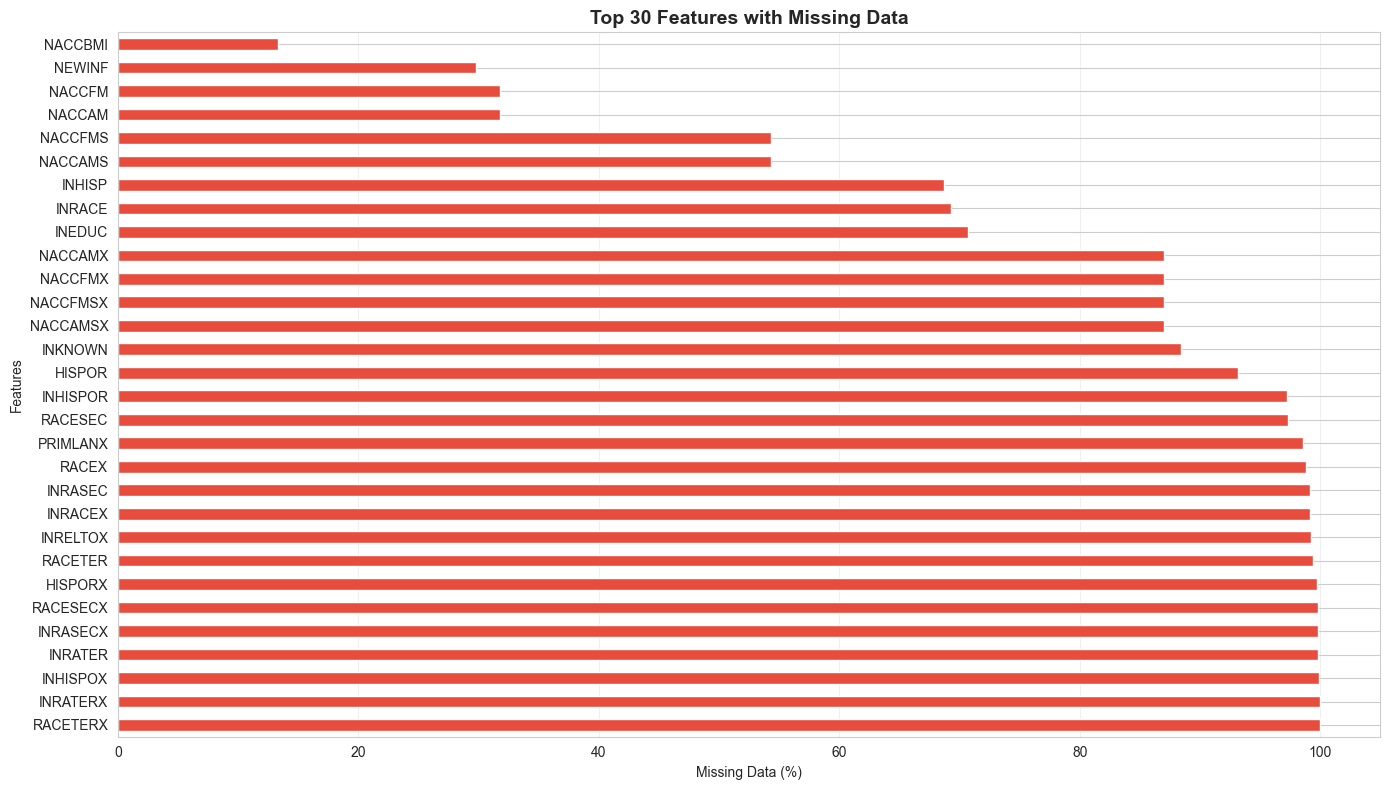

In [18]:
missing_pct = (df_work.isnull().sum() / len(df_work) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

if len(missing_pct) > 0:
    plt.figure(figsize=(14, 8))
    missing_pct.head(30).plot(kind='barh', color='#e74c3c')
    plt.title('Top 30 Features with Missing Data', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Data (%)')
    plt.ylabel('Features')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values in dataset!")

exploratory data analysis

In [19]:
X = df_work.drop(columns=[TARGET])
y = df_work[TARGET]

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget balance: {y.value_counts(normalize=True)}")

Features (X): (195196, 69)
Target (y): (195196,)

Target distribution:
DEMENTED
0    137606
1     57590
Name: count, dtype: int64

Target balance: DEMENTED
0    0.704963
1    0.295037
Name: proportion, dtype: float64


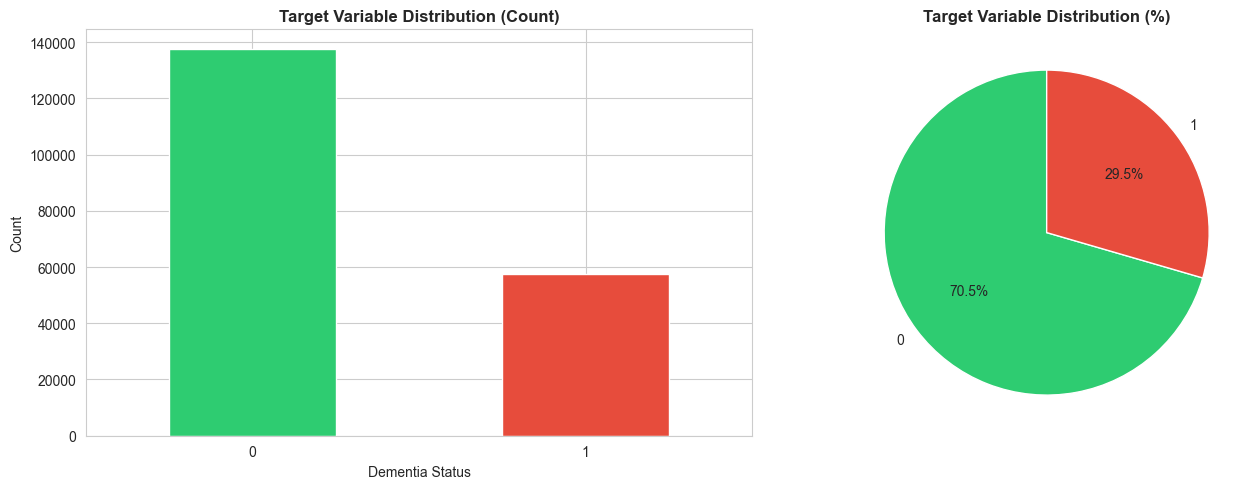

   Class imbalance detected!
   Consider using SMOTE or class weights in models.


In [26]:
# Target distribution plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
y.value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Target Variable Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Dementia Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
y.value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                      colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Target Variable Distribution (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Check for class imbalance
class_balance = y.value_counts(normalize=True)
if class_balance.min() < 0.3:
    print("   Class imbalance detected!")
    print("   Consider using SMOTE or class weights in models.")
else:
    print(" Classes are reasonably balanced.")